In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [2]:
pd.set_option('display.max_columns',25)

In [3]:
credit_data = pd.read_csv("C:/Users/I_am_AlexX/Downloads/german.data",sep=' ',names=["Estado_de_la_cuenta_de_cheques_existente","Duración_en_meses","Historial_de_crédito","Propósito","Monto_de_crédito","Cuenta_de_ahorros","Empleo_actual_desde","Tasa_de_cuota_en_porcentaje_del_ingreso_disponible","Estado_personal_y_sexo","Otros_deudores","Residencia_actual_desde","Propiedad","Edad_en_años","Otros_planes_de_cuotas","Alojamiento","Número_de_créditos_existentes_en_este_banco","Trabajo","Número_de_personas_que_están_obligadas_a_proporcionar_alimentos_a","Teléfono","Trabajador_extranjero","Clase"])

In [4]:
credit_data.head()

,Estado_de_la_cuenta_de_cheques_existente,Duración_en_meses,Historial_de_crédito,Propósito,Monto_de_crédito,Cuenta_de_ahorros,Empleo_actual_desde,Tasa_de_cuota_en_porcentaje_del_ingreso_disponible,Estado_personal_y_sexo,Otros_deudores,Residencia_actual_desde,Propiedad,Edad_en_años,Otros_planes_de_cuotas,Alojamiento,Número_de_créditos_existentes_en_este_banco,Trabajo,Número_de_personas_que_están_obligadas_a_proporcionar_alimentos_a,Teléfono,Trabajador_extranjero,Clase
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [5]:
credit_data.shape

(1000, 21)

In [6]:
credit_data['Clase'] = credit_data['Clase']-1

In [7]:
credit_data['Clase'] 

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: Clase, Length: 1000, dtype: int64

In [8]:
credit_data.groupby(["Historial_de_crédito"]).count()

,Estado_de_la_cuenta_de_cheques_existente,Duración_en_meses,Propósito,Monto_de_crédito,Cuenta_de_ahorros,Empleo_actual_desde,Tasa_de_cuota_en_porcentaje_del_ingreso_disponible,Estado_personal_y_sexo,Otros_deudores,Residencia_actual_desde,Propiedad,Edad_en_años,Otros_planes_de_cuotas,Alojamiento,Número_de_créditos_existentes_en_este_banco,Trabajo,Número_de_personas_que_están_obligadas_a_proporcionar_alimentos_a,Teléfono,Trabajador_extranjero,Clase
Historial_de_crédito,,,,,,,,,,,,,,,,,,,,
A30,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
A31,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
A32,530,530,530,530,530,530,530,530,530,530,530,530,530,530,530,530,530,530,530,530
A33,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88
A34,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293


In [9]:
credit_data.groupby(["Historial_de_crédito"])['Clase'].agg(['count','sum'])

,count,sum
Historial_de_crédito,,
A30,40,25
A31,49,28
A32,530,169
A33,88,28
A34,293,50


In [10]:
credit_data.groupby(['Historial_de_crédito']).sum()

,Duración_en_meses,Monto_de_crédito,Tasa_de_cuota_en_porcentaje_del_ingreso_disponible,Residencia_actual_desde,Edad_en_años,Número_de_créditos_existentes_en_este_banco,Número_de_personas_que_están_obligadas_a_proporcionar_alimentos_a,Clase
Historial_de_crédito,,,,,,,,
A30,1115,212227,107,114,1372,69,47,25
A31,1112,163899,153,146,1777,57,62,28
A32,10659,1611708,1564,1463,17955,590,598,169
A33,2307,378629,257,244,3180,147,106,28
A34,5710,904795,892,878,11262,544,342,50


In [11]:
credit_data.groupby(['Historial_de_crédito']).count()

,Estado_de_la_cuenta_de_cheques_existente,Duración_en_meses,Propósito,Monto_de_crédito,Cuenta_de_ahorros,Empleo_actual_desde,Tasa_de_cuota_en_porcentaje_del_ingreso_disponible,Estado_personal_y_sexo,Otros_deudores,Residencia_actual_desde,Propiedad,Edad_en_años,Otros_planes_de_cuotas,Alojamiento,Número_de_créditos_existentes_en_este_banco,Trabajo,Número_de_personas_que_están_obligadas_a_proporcionar_alimentos_a,Teléfono,Trabajador_extranjero,Clase
Historial_de_crédito,,,,,,,,,,,,,,,,,,,,
A30,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
A31,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
A32,530,530,530,530,530,530,530,530,530,530,530,530,530,530,530,530,530,530,530,530
A33,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88
A34,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293


In [12]:
credit_data.groupby(['Historial_de_crédito'])["Clase"].mean()

Historial_de_crédito
A30    0.625000
A31    0.571429
A32    0.318868
A33    0.318182
A34    0.170648
Name: Clase, dtype: float64

In [13]:
credit_data.groupby(['Historial_de_crédito'])["Clase"].count()

Historial_de_crédito
A30     40
A31     49
A32    530
A33     88
A34    293
Name: Clase, dtype: int64

In [14]:
credit_data.groupby(['Historial_de_crédito'])["Clase"].sum()

Historial_de_crédito
A30     25
A31     28
A32    169
A33     28
A34     50
Name: Clase, dtype: int64

In [15]:
# El valor de la variable de clase "1" indica incumplimiento y "0" describe no incumplimiento

# Si el tipo de datos es objeto, esto significa que es una variable categórica y cualquier otra variable, como int64, etc., 
# se tratará como continua y se clasificará en 10 partes iguales (también conocidas como deciles) según corresponda.

def IV_calc(data,var):
    if data[var].dtypes == "object":
        
        dataf = data.groupby([var])['Clase'].agg(['count','sum']) #.agg--> Agregue usando una o más operaciones sobre el 
        # eje especificado. 
        # Los datos se agrupan por "var" (la variable en cuestión) mostrando sólo la columna correspondiente a la variable
        # "Clase". Y efectuando las operaciones "count" y "sum" . La primera cuenta el número de filas en el data set original 
        #que contienen alguna de las etiquetas de "Historial_de_crédito"(por ejemplo), estos son: "A30,A31,A32,A33 y A34". En cuanto a sum()
        # suma los valores que tiene cada etiqueta ya sea "0" o "1"
         
        dataf.columns = ["Total","incumplido"]
        dataf["cumplido"] = dataf["Total"] - dataf["incumplido"] # cuenta total de personas cumplidas
        
        dataf["per_incump"] = dataf["incumplido"]/dataf["incumplido"].sum() # porcentaje del total de personas incumplidas 
                                                                            # para cada Historial de crédito específico
        
        dataf["per_cump"] = dataf["cumplido"]/dataf["cumplido"].sum()       # porcentaje del total de personas cumplidas 
                                                                            # para cada Historial de crédito específico
            
        dataf["I_V"] = (dataf["per_cump"] - dataf["per_incump"])*np.log(dataf["per_cump"]/dataf["per_incump"]) # Cálculo
        
        # explícito del valor de la información o "Information Value"
                
        return dataf
    else:
        
        data['bin_var'] = pd.qcut(data[var].rank(method='first'),10) # qcut, Discretiza la variable en cubos de igual tamaño 
                                                                     # según el rango o según los cuantiles de muestra. 
                                                                     # Por ejemplo, 1000 valores para 10 cuantiles producirían 
                                                                     # un objeto categórico que indicaría la pertenencia al 
                                                                     #cuantil para cada punto de datos.
        
        
                                                                     # rank->asigna un número según el valor que tenga en 
                                                                     #la columna del menor(0) al mayor(1000)
            
        dataf = data.groupby(['bin_var'])['Clase'].agg(['count','sum']) #.agg--> Agregue usando una o más operaciones sobre el 
        # eje especificado. 
        # Los datos se agrupan por "bin_var" (es decir por cada uno de los 10 cuantiles) mostrando sólo la columna correspondiente 
        #a la variable "Clase". Y efectuando las operaciones "count" y "sum" . La primera cuenta el número de filas en el data set 
        #original que contienen alguna de las etiquetas de "bin_var", estos son: "(0.999, 100.9],(100.9, 200.8],(300.7, 400.6]
        #,etc". En cuanto a sum() suma los valores que tiene cada etiqueta ya sea "0" o "1"
        
        dataf.columns = ["Total","incumplido"] #asignando headers a las columnas
        
        dataf["cumplido"] = dataf["Total"] - dataf["incumplido"]  # cuenta total de personas cumplidas
        
        dataf["per_incump"] = dataf["incumplido"]/dataf["incumplido"].sum() # porcentaje del total de personas incumplidas 
                                                                            # para cada valor de "Duración en meses" específico
        
        dataf["per_cump"] = dataf["cumplido"]/dataf["cumplido"].sum() # porcentaje del total de personas incumplidas 
                                                                      # para cada valor de "Duración en meses" específico
            
        dataf["I_V"] = (dataf["per_cump"] - dataf["per_incump"])*np.log(dataf["per_cump"]/dataf["per_incump"]) # Cálculo
        
        # explícito del valor de la información o "Information Value"
                
                
        return dataf

## Cálculo del Information Value para 'Historial_de_crédito'

In [16]:
print(IV_calc(credit_data,'Historial_de_crédito'))

                      Total  incumplido  cumplido  per_incump  per_cump  \
Historial_de_crédito                                                      
A30                      40          25        15    0.083333  0.021429   
A31                      49          28        21    0.093333  0.030000   
A32                     530         169       361    0.563333  0.515714   
A33                      88          28        60    0.093333  0.085714   
A34                     293          50       243    0.166667  0.347143   

                           I_V  
Historial_de_crédito            
A30                   0.084074  
A31                   0.071882  
A32                   0.004206  
A33                   0.000649  
A34                   0.132423  


In [17]:
IV_calc(credit_data,'Historial_de_crédito').I_V.sum()

0.2932335473908263

## Cálculo del Information Value para 'Duración_en_meses'

In [18]:
print(IV_calc(credit_data,'Duración_en_meses'))

                 Total  incumplido  cumplido  per_incump  per_cump       I_V
bin_var                                                                     
(0.999, 100.9]     100          11        89    0.036667  0.127143  0.112502
(100.9, 200.8]     100          20        80    0.066667  0.114286  0.025667
(200.8, 300.7]     100          27        73    0.090000  0.104286  0.002105
(300.7, 400.6]     100          25        75    0.083333  0.107143  0.005984
(400.6, 500.5]     100          26        74    0.086667  0.105714  0.003784
(500.5, 600.4]     100          38        62    0.126667  0.088571  0.013629
(600.4, 700.3]     100          32        68    0.106667  0.097143  0.000891
(700.3, 800.2]     100          31        69    0.103333  0.098571  0.000225
(800.2, 900.1]     100          42        58    0.140000  0.082857  0.029973
(900.1, 1000.0]    100          48        52    0.160000  0.074286  0.065765


In [19]:
IV_calc(credit_data,'Duración_en_meses').I_V.sum()

0.26052252233213913

In [20]:
pd.qcut(credit_data['Duración_en_meses'].rank(method='first'),10)

0       (0.999, 100.9]
1      (900.1, 1000.0]
2       (100.9, 200.8]
3      (900.1, 1000.0]
4       (500.5, 600.4]
            ...       
995     (300.7, 400.6]
996     (800.2, 900.1]
997     (300.7, 400.6]
998    (900.1, 1000.0]
999    (900.1, 1000.0]
Name: Duración_en_meses, Length: 1000, dtype: category
Categories (10, interval[float64]): [(0.999, 100.9] < (100.9, 200.8] < (200.8, 300.7] < (300.7, 400.6] ... (600.4, 700.3] < (700.3, 800.2] < (800.2, 900.1] < (900.1, 1000.0]]

In [21]:
credit_data['Duración_en_meses'].rank(method='first') 

0        8.0
1      937.0
2      181.0
3      920.0
4      587.0
       ...  
995    358.0
996    827.0
997    359.0
998    934.0
999    935.0
Name: Duración_en_meses, Length: 1000, dtype: float64

In [22]:
credit_data['Duración_en_meses']

0       6
1      48
2      12
3      42
4      24
       ..
995    12
996    30
997    12
998    45
999    45
Name: Duración_en_meses, Length: 1000, dtype: int64

In [23]:
for seq in range(5):
    print(seq)

0
1
2
3
4


In [24]:
pd.qcut(range(5), 4)

[(-0.001, 1.0], (-0.001, 1.0], (1.0, 2.0], (2.0, 3.0], (3.0, 4.0]]
Categories (4, interval[float64]): [(-0.001, 1.0] < (1.0, 2.0] < (2.0, 3.0] < (3.0, 4.0]]

In [25]:
credit_data['bin_var'] = pd.qcut(credit_data['Duración_en_meses'].rank(method='first'),10)

credit_data['bin_var'] 

In [26]:
credit_data.groupby(['bin_var'])['Clase'].agg(['count','sum'])

,count,sum
bin_var,,
"(0.999, 100.9]",100,11
"(100.9, 200.8]",100,20
"(200.8, 300.7]",100,27
"(300.7, 400.6]",100,25
"(400.6, 500.5]",100,26
"(500.5, 600.4]",100,38
"(600.4, 700.3]",100,32
"(700.3, 800.2]",100,31
"(800.2, 900.1]",100,42


## Cálculo del Information Value automatizado 

In [27]:
# El siguiente módulo, crea un array con las variables que deseen obtener del header
# Data Frame "data"

#Parametros: data , n 

def get_variables(data,n):
    
    header_arr = sorted(data) #obtener un array que contiene los elementos del header del DataFrame
    num_variables_extracted = range(n)
    variables = np.array(header_arr)[num_variables_extracted]
    
    return variables

In [28]:
var_arr=get_variables(credit_data,21)

In [29]:
var_arr

array(['Alojamiento', 'Clase', 'Cuenta_de_ahorros', 'Duración_en_meses',
       'Edad_en_años', 'Empleo_actual_desde',
       'Estado_de_la_cuenta_de_cheques_existente',
       'Estado_personal_y_sexo', 'Historial_de_crédito',
       'Monto_de_crédito', 'Número_de_créditos_existentes_en_este_banco',
       'Número_de_personas_que_están_obligadas_a_proporcionar_alimentos_a',
       'Otros_deudores', 'Otros_planes_de_cuotas', 'Propiedad',
       'Propósito', 'Residencia_actual_desde',
       'Tasa_de_cuota_en_porcentaje_del_ingreso_disponible', 'Teléfono',
       'Trabajador_extranjero', 'Trabajo'], dtype='<U65')

In [30]:
np.delete(var_arr,1)

array(['Alojamiento', 'Cuenta_de_ahorros', 'Duración_en_meses',
       'Edad_en_años', 'Empleo_actual_desde',
       'Estado_de_la_cuenta_de_cheques_existente',
       'Estado_personal_y_sexo', 'Historial_de_crédito',
       'Monto_de_crédito', 'Número_de_créditos_existentes_en_este_banco',
       'Número_de_personas_que_están_obligadas_a_proporcionar_alimentos_a',
       'Otros_deudores', 'Otros_planes_de_cuotas', 'Propiedad',
       'Propósito', 'Residencia_actual_desde',
       'Tasa_de_cuota_en_porcentaje_del_ingreso_disponible', 'Teléfono',
       'Trabajador_extranjero', 'Trabajo'], dtype='<U65')

In [31]:
def IV_calc_auto(data):
    
    arr=[]
    
    for var in np.delete(var_arr,1):
        
        IV = IV_calc(data,var)
        arr.append(IV)
    return arr

In [32]:
IV_calc_auto(credit_data)

[             Total  incumplido  cumplido  per_incump  per_cump       I_V
 Alojamiento                                                             
 A151           179          70       109    0.233333  0.155714  0.031393
 A152           713         186       527    0.620000  0.752857  0.025795
 A153           108          44        64    0.146667  0.091429  0.026106,
                    Total  incumplido  cumplido  per_incump  per_cump       I_V
 Cuenta_de_ahorros                                                             
 A61                  603         217       386    0.723333  0.551429  0.046648
 A62                  103          34        69    0.113333  0.098571  0.002060
 A63                   63          11        52    0.036667  0.074286  0.026561
 A64                   48           6        42    0.020000  0.060000  0.043944
 A65                  183          32       151    0.106667  0.215714  0.076796,
                  Total  incumplido  cumplido  per_incump  per_cump 

In [33]:
arr1=[]
arr2=[]
for dataset in IV_calc_auto(credit_data):
    arr1.append(dataset.I_V.sum())
for var in np.delete(var_arr,1):
      arr2.append(var)
      

In [34]:
np.concatenate((arr1,arr2), axis=0)

array(['0.08329343361549926', '0.19600955690422672',
       '0.26052252233213913', '0.10267245670259074', '0.086433631026641',
       '0.6660115033513336', '0.04467067763379073', '0.2932335473908263',
       '0.11342803024552867', '0.09779114631307396',
       '0.03408883520785682', '0.032019322019485055',
       '0.057614541955647885', '0.11263826240979674',
       '0.16919506567307832', '0.04874371881018562',
       '0.06155468378629412', '0.0063776050286746735',
       '0.04387741201028899', '0.008762765707428294', 'Alojamiento',
       'Cuenta_de_ahorros', 'Duración_en_meses', 'Edad_en_años',
       'Empleo_actual_desde', 'Estado_de_la_cuenta_de_cheques_existente',
       'Estado_personal_y_sexo', 'Historial_de_crédito',
       'Monto_de_crédito', 'Número_de_créditos_existentes_en_este_banco',
       'Número_de_personas_que_están_obligadas_a_proporcionar_alimentos_a',
       'Otros_deudores', 'Otros_planes_de_cuotas', 'Propiedad',
       'Propósito', 'Residencia_actual_desde',
    

In [35]:
IV_calc_auto(credit_data)[0].I_V.sum()

0.08329343361549926

In [36]:
IV_calc_auto(credit_data)[1].I_V.sum()

0.19600955690422672

In [37]:
d = {'Variable': arr2, 'Valor de la información (Information Value)': arr1}
df1 = pd.DataFrame(data=d)

In [38]:
df1

,Variable,Valor de la información (Information Value)
0,Alojamiento,0.083293
1,Cuenta_de_ahorros,0.196010
2,Duración_en_meses,0.260523
3,Edad_en_años,0.102672
4,Empleo_actual_desde,0.086434
5,Estado_de_la_cuenta_de_cheques_existente,0.666012
6,Estado_personal_y_sexo,0.044671
7,Historial_de_crédito,0.293234
8,Monto_de_crédito,0.113428
9,Número_de_créditos_existentes_en_este_banco,0.097791


In [39]:
df1.sort_values(by='Valor de la información (Information Value)', ascending=False)

,Variable,Valor de la información (Information Value)
5,Estado_de_la_cuenta_de_cheques_existente,0.666012
7,Historial_de_crédito,0.293234
2,Duración_en_meses,0.260523
1,Cuenta_de_ahorros,0.196010
14,Propósito,0.169195
8,Monto_de_crédito,0.113428
13,Propiedad,0.112638
3,Edad_en_años,0.102672
9,Número_de_créditos_existentes_en_este_banco,0.097791
4,Empleo_actual_desde,0.086434


# Solución alternativa al problema de automatizar el cálculo de IV (Information Value)

In [40]:
credit_data.head()

,Estado_de_la_cuenta_de_cheques_existente,Duración_en_meses,Historial_de_crédito,Propósito,Monto_de_crédito,Cuenta_de_ahorros,Empleo_actual_desde,Tasa_de_cuota_en_porcentaje_del_ingreso_disponible,Estado_personal_y_sexo,Otros_deudores,Residencia_actual_desde,Propiedad,Edad_en_años,Otros_planes_de_cuotas,Alojamiento,Número_de_créditos_existentes_en_este_banco,Trabajo,Número_de_personas_que_están_obligadas_a_proporcionar_alimentos_a,Teléfono,Trabajador_extranjero,Clase,bin_var
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,0,"(500.5, 600.4]"
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,1,"(100.9, 200.8]"
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,0,"(100.9, 200.8]"
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,0,"(100.9, 200.8]"
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,1,"(300.7, 400.6]"


In [41]:
arr_tot=credit_data.columns.values

In [42]:
arr_tot

array(['Estado_de_la_cuenta_de_cheques_existente', 'Duración_en_meses',
       'Historial_de_crédito', 'Propósito', 'Monto_de_crédito',
       'Cuenta_de_ahorros', 'Empleo_actual_desde',
       'Tasa_de_cuota_en_porcentaje_del_ingreso_disponible',
       'Estado_personal_y_sexo', 'Otros_deudores',
       'Residencia_actual_desde', 'Propiedad', 'Edad_en_años',
       'Otros_planes_de_cuotas', 'Alojamiento',
       'Número_de_créditos_existentes_en_este_banco', 'Trabajo',
       'Número_de_personas_que_están_obligadas_a_proporcionar_alimentos_a',
       'Teléfono', 'Trabajador_extranjero', 'Clase', 'bin_var'],
      dtype=object)

In [43]:
arr_tot=np.delete(arr_tot,(20,21))

In [44]:
arr_tot.tolist()

['Estado_de_la_cuenta_de_cheques_existente',
 'Duración_en_meses',
 'Historial_de_crédito',
 'Propósito',
 'Monto_de_crédito',
 'Cuenta_de_ahorros',
 'Empleo_actual_desde',
 'Tasa_de_cuota_en_porcentaje_del_ingreso_disponible',
 'Estado_personal_y_sexo',
 'Otros_deudores',
 'Residencia_actual_desde',
 'Propiedad',
 'Edad_en_años',
 'Otros_planes_de_cuotas',
 'Alojamiento',
 'Número_de_créditos_existentes_en_este_banco',
 'Trabajo',
 'Número_de_personas_que_están_obligadas_a_proporcionar_alimentos_a',
 'Teléfono',
 'Trabajador_extranjero']

In [45]:
#discrete_columns = ['Estado_de_la_cuenta_de_cheques_existente','Historial_de_crédito', 'Propósito','Cuenta_de_ahorros', 'Empleo_actual_desde,','Tasa_de_cuota_en_porcentaje_del_ingreso_disponible',
#       'Estado_personal_y_sexo', 'Otros_deudores','Propiedad','Otros_planes_de_cuotas', 'Alojamiento', 'Trabajo','Teléfono', 'Trabajador_extranjero']


#continuous_columns = ['Duración_en_meses', 'Monto_de_crédito','Tasa_de_cuota_en_porcentaje_del_ingreso_disponible',
#'Residencia_actual_desde', 'Edad_en_años','Otros_planes_de_cuotas', 'Alojamiento','Número_de_créditos_existentes_en_este_banco',
#'Número_de_personas_que_están_obligadas_a_proporcionar_alimentos_a']
#discrete_columns + continuous_columns


total_columns = credit_data.columns.values
arr_tot=np.delete(total_columns,(20,21)).tolist()

# List of IV values
Iv_list = []

for col in arr_tot:
    assigned_data = IV_calc(data = credit_data,var = col)
    iv_val = round(assigned_data["I_V"].sum(),3)
    dt_type = credit_data[col].dtypes
    Iv_list.append((iv_val,col,dt_type))

Iv_list = sorted(Iv_list,reverse = True)


for i in range(len(Iv_list)):
    
    print (Iv_list[i][0],",",Iv_list[i][1],",type =",Iv_list[i][2])

0.666 , Estado_de_la_cuenta_de_cheques_existente ,type = object
0.293 , Historial_de_crédito ,type = object
0.261 , Duración_en_meses ,type = int64
0.196 , Cuenta_de_ahorros ,type = object
0.169 , Propósito ,type = object
0.113 , Propiedad ,type = object
0.113 , Monto_de_crédito ,type = int64
0.103 , Edad_en_años ,type = int64
0.098 , Número_de_créditos_existentes_en_este_banco ,type = int64
0.086 , Empleo_actual_desde ,type = object
0.083 , Alojamiento ,type = object
0.062 , Tasa_de_cuota_en_porcentaje_del_ingreso_disponible ,type = int64
0.058 , Otros_planes_de_cuotas ,type = object
0.049 , Residencia_actual_desde ,type = int64
0.045 , Estado_personal_y_sexo ,type = object
0.044 , Trabajador_extranjero ,type = object
0.034 , Número_de_personas_que_están_obligadas_a_proporcionar_alimentos_a ,type = int64
0.032 , Otros_deudores ,type = object
0.009 , Trabajo ,type = object
0.006 , Teléfono ,type = object


In [46]:
dummy_estche =pd.get_dummies(credit_data['Estado_de_la_cuenta_de_cheques_existente'],
prefix='estado_cuenta_exist')

dummy_hc = pd.get_dummies(credit_data['Historial_de_crédito'],
prefix='hist_cred')

dummy_cueah = pd.get_dummies(credit_data['Cuenta_de_ahorros'],
prefix='cuent_ahorros')

dummy_prop = pd.get_dummies(credit_data['Propósito'],
prefix='propósito')

dummy_property = pd.get_dummies(credit_data['Propiedad'],
prefix='propiedad')

dummy_othinstpln =pd.get_dummies(credit_data['Otros_planes_de_cuotas'],
prefix='otros_planes_cuot')

dummy_empact = pd.get_dummies(credit_data['Empleo_actual_desde'], prefix='emp_act_desde')

dummy_perssx = pd.get_dummies(credit_data['Estado_personal_y_sexo'],
prefix='estado_pers_sexo')

dummy_forgnwrkr = pd.get_dummies(credit_data['Trabajador_extranjero'],
prefix='trabajador_extranj')

dummy_othdts = pd.get_dummies(credit_data['Otros_deudores'],
prefix='otros_deud')

continuous_columns = ['Duration_in_month', 'Credit_amount',
'Installment_rate_in_percentage_of_disposable_income', 'Age_in_years',
'Number_of_existing_credits_at_this_bank']

continuous_columns = ['Duración_en_meses', 'Monto_de_crédito','Tasa_de_cuota_en_porcentaje_del_ingreso_disponible',
                      'Edad_en_años','Número_de_créditos_existentes_en_este_banco']

credit_continuous = credit_data[continuous_columns]

credit_data_new = pd.concat([dummy_estche,dummy_hc,dummy_cueah
,dummy_prop,dummy_property,dummy_othinstpln,dummy_empact
,dummy_perssx,dummy_forgnwrkr,dummy_othdts,credit_continuous,credit_data['Clase']],axis=1)

In [47]:
credit_data_new.columns.values

array(['estado_cuenta_exist_A11', 'estado_cuenta_exist_A12',
       'estado_cuenta_exist_A13', 'estado_cuenta_exist_A14',
       'hist_cred_A30', 'hist_cred_A31', 'hist_cred_A32', 'hist_cred_A33',
       'hist_cred_A34', 'cuent_ahorros_A61', 'cuent_ahorros_A62',
       'cuent_ahorros_A63', 'cuent_ahorros_A64', 'cuent_ahorros_A65',
       'propósito_A40', 'propósito_A41', 'propósito_A410',
       'propósito_A42', 'propósito_A43', 'propósito_A44', 'propósito_A45',
       'propósito_A46', 'propósito_A48', 'propósito_A49',
       'propiedad_A121', 'propiedad_A122', 'propiedad_A123',
       'propiedad_A124', 'otros_planes_cuot_A141',
       'otros_planes_cuot_A142', 'otros_planes_cuot_A143',
       'emp_act_desde_A71', 'emp_act_desde_A72', 'emp_act_desde_A73',
       'emp_act_desde_A74', 'emp_act_desde_A75', 'estado_pers_sexo_A91',
       'estado_pers_sexo_A92', 'estado_pers_sexo_A93',
       'estado_pers_sexo_A94', 'trabajador_extranj_A201',
       'trabajador_extranj_A202', 'otros_deud_A1

In [48]:
x_train,x_test,y_train,y_test = train_test_split(
credit_data_new.drop(['Clase'] ,axis=1),credit_data_new['Clase'],train_size
= 0.7,random_state=42)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [49]:
remove_cols_extra_dummy = ['estado_cuenta_exist_A11', 'hist_cred_A30',
'propósito_A40', 'cuent_ahorros_A61','emp_act_desde_A71','estado_pers_sexo_A91',
'otros_deud_A101','propiedad_A121', 'otros_planes_cuot_A141','trabajador_extranj_A201']

In [50]:
# Aquí, hemos creado la lista adicional para eliminar variables insignificantes paso a paso de forma iterativa mientras 
# trabajamos en la metodología de eliminación hacia atrás; después del final de cada iteración, seguiremos agregando la 
# variable más insignificante y multicolineal a la lista remove_cols_insig, para que esas variables se eliminen mientras 
# se entrena el modelo.
remove_cols_insig = []
remove_cols = list(set(remove_cols_extra_dummy+remove_cols_insig))

In [51]:
remove_cols

['otros_deud_A101',
 'propiedad_A121',
 'otros_planes_cuot_A141',
 'trabajador_extranj_A201',
 'propósito_A40',
 'hist_cred_A30',
 'cuent_ahorros_A61',
 'estado_pers_sexo_A91',
 'estado_cuenta_exist_A11',
 'emp_act_desde_A71']

# logistic_model

In [52]:
import statsmodels.api as sm
logistic_model = sm.Logit(y_train, sm.add_constant(x_train.drop(
remove_cols, axis=1))).fit()
print (logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.456186
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Clase   No. Observations:                  700
Model:                          Logit   Df Residuals:                      659
Method:                           MLE   Df Model:                           40
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.2517
Time:                        14:29:10   Log-Likelihood:                -319.33
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 8.624e-26
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                       

## Cálculo del VIF

In [53]:
#x_train

In [54]:
#x_train.columns

In [55]:
#x_train.drop(remove_cols,axis=1).columns

In [56]:
cnames = x_train.drop(remove_cols,axis=1).columns #elimina la primera columna de cada categoría en x_train
for i in np.arange(0,len(cnames)): 
    xvars = list(cnames) 
    
yvar = xvars.pop(1)
print(yvar)

estado_cuenta_exist_A13


In [57]:
print ("\nFactor de inflación de varianza(Variance Inflation Factor)")
cnames = x_train.drop(remove_cols,axis=1).columns #elimina la primera columna de cada categoría en x_train
for i in np.arange(0,len(cnames)): 
    xvars = list(cnames) 
    yvar = xvars.pop(i)
#print(xvars)
#print(((yvar)))
    print(sm.add_constant(x_train.drop(remove_cols,axis=1)[xvars]))


Factor de inflación de varianza(Variance Inflation Factor)
     const  estado_cuenta_exist_A13  estado_cuenta_exist_A14  hist_cred_A31  \
541    1.0                        0                        1              0   
440    1.0                        0                        1              0   
482    1.0                        0                        0              0   
422    1.0                        0                        0              0   
778    1.0                        0                        1              0   
..     ...                      ...                      ...            ...   
106    1.0                        0                        1              1   
270    1.0                        0                        1              0   
860    1.0                        0                        1              0   
435    1.0                        0                        0              0   
102    1.0                        0                        1           

[700 rows x 40 columns]
     const  estado_cuenta_exist_A12  estado_cuenta_exist_A13  \
541    1.0                        0                        0   
440    1.0                        0                        0   
482    1.0                        0                        0   
422    1.0                        1                        0   
778    1.0                        0                        0   
..     ...                      ...                      ...   
106    1.0                        0                        0   
270    1.0                        0                        0   
860    1.0                        0                        0   
435    1.0                        1                        0   
102    1.0                        0                        0   

     estado_cuenta_exist_A14  hist_cred_A31  hist_cred_A32  hist_cred_A34  \
541                        1              0              0              0   
440                        1              0          

     const  estado_cuenta_exist_A12  estado_cuenta_exist_A13  \
541    1.0                        0                        0   
440    1.0                        0                        0   
482    1.0                        0                        0   
422    1.0                        1                        0   
778    1.0                        0                        0   
..     ...                      ...                      ...   
106    1.0                        0                        0   
270    1.0                        0                        0   
860    1.0                        0                        0   
435    1.0                        1                        0   
102    1.0                        0                        0   

     estado_cuenta_exist_A14  hist_cred_A31  hist_cred_A32  hist_cred_A33  \
541                        1              0              0              1   
440                        1              0              1              0   


     const  estado_cuenta_exist_A12  estado_cuenta_exist_A13  \
541    1.0                        0                        0   
440    1.0                        0                        0   
482    1.0                        0                        0   
422    1.0                        1                        0   
778    1.0                        0                        0   
..     ...                      ...                      ...   
106    1.0                        0                        0   
270    1.0                        0                        0   
860    1.0                        0                        0   
435    1.0                        1                        0   
102    1.0                        0                        0   

     estado_cuenta_exist_A14  hist_cred_A31  hist_cred_A32  hist_cred_A33  \
541                        1              0              0              1   
440                        1              0              1              0   


     const  estado_cuenta_exist_A12  estado_cuenta_exist_A13  \
541    1.0                        0                        0   
440    1.0                        0                        0   
482    1.0                        0                        0   
422    1.0                        1                        0   
778    1.0                        0                        0   
..     ...                      ...                      ...   
106    1.0                        0                        0   
270    1.0                        0                        0   
860    1.0                        0                        0   
435    1.0                        1                        0   
102    1.0                        0                        0   

     estado_cuenta_exist_A14  hist_cred_A31  hist_cred_A32  hist_cred_A33  \
541                        1              0              0              1   
440                        1              0              1              0   


     const  estado_cuenta_exist_A12  estado_cuenta_exist_A13  \
541    1.0                        0                        0   
440    1.0                        0                        0   
482    1.0                        0                        0   
422    1.0                        1                        0   
778    1.0                        0                        0   
..     ...                      ...                      ...   
106    1.0                        0                        0   
270    1.0                        0                        0   
860    1.0                        0                        0   
435    1.0                        1                        0   
102    1.0                        0                        0   

     estado_cuenta_exist_A14  hist_cred_A31  hist_cred_A32  hist_cred_A33  \
541                        1              0              0              1   
440                        1              0              1              0   


In [58]:
x_train.drop(remove_cols,axis=1)

,estado_cuenta_exist_A12,estado_cuenta_exist_A13,estado_cuenta_exist_A14,hist_cred_A31,hist_cred_A32,hist_cred_A33,hist_cred_A34,cuent_ahorros_A62,cuent_ahorros_A63,cuent_ahorros_A64,cuent_ahorros_A65,propósito_A41,...,emp_act_desde_A75,estado_pers_sexo_A92,estado_pers_sexo_A93,estado_pers_sexo_A94,trabajador_extranj_A202,otros_deud_A102,otros_deud_A103,Duración_en_meses,Monto_de_crédito,Tasa_de_cuota_en_porcentaje_del_ingreso_disponible,Edad_en_años,Número_de_créditos_existentes_en_este_banco
541,0,0,1,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,24,2032,4,60,2
440,0,0,1,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,12,1884,4,39,1
482,0,0,0,0,1,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,30,3622,4,57,2
422,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,12,958,2,47,2
778,0,0,1,0,0,0,1,0,0,1,0,1,...,1,0,1,0,0,0,0,36,5711,4,38,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,0,1,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,18,6458,2,39,2
270,0,0,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,18,2662,4,32,1
860,0,0,1,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,24,5804,4,27,2
435,1,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,12,1484,2,25,1


In [59]:
print ("\nFactor de inflación de varianza(Variance Inflation Factor)")
cnames = x_train.drop(remove_cols,axis=1).columns #elimina la primera columna de cada categoría en x_train


for i in np.arange(0,len(cnames)): # se crea un array Numpy que va desde 0 hasta a longitud de cnames (en este caso 40)
    
    xvars = list(cnames) #lista que contiene los nombres de las columnas ya con el filtro de "cnames" 
    
    yvar = xvars.pop(i) # los 40 valores de cada columna siendo esttas las variables de respuesta
    mod = sm.OLS(x_train.drop(remove_cols,axis=1)[yvar], sm.add_constant(x_train.drop(remove_cols,axis=1)[xvars])) #calcula
    # los mínimos cuadrados ordinarios (OLS)
    # model = sm.OLS(Y,X) <---- sintaxis
    
    # X ---> sm.add_constant(x_train.drop(remove_cols,axis=1)[xvars]) ---> 40 data sets cuya primera columna es una columna de "unos"
    # agregada a cada data set que antes poseía 39 coumnas al sere extraído una columna del data set original
    
    # Y ---> Cada header de cada columna se usa como variable de respuesta
    
    res = mod.fit()
    print(res)


Factor de inflación de varianza(Variance Inflation Factor)


In [60]:
print ("\nFactor de inflación de varianza(Variance Inflation Factor)")
cnames = x_train.drop(remove_cols,axis=1).columns #elimina la primera columna de cada categoría en x_train

for i in np.arange(0,len(cnames)): # se crea un array Numpy que va desde 0 hasta a longitud de cnames (en este caso 40)
    
    xvars = list(cnames) #40 listas que contiene los nombres de las columnas ya con el filtro de "cnames" (cada una tiene 39)
    
    yvar = xvars.pop(i) # los 40 valores de cada columna siendo esttas las variables de respuesta
    mod = sm.OLS(x_train.drop(remove_cols,axis=1)[yvar], x_train.drop(remove_cols,axis=1)[xvars]) #calcula
    # los mínimos cuadrados ordinarios (OLS)
    # model = sm.OLS(Y,X) <---- sintaxis
    
    # X ---> sm.add_constant(x_train.drop(remove_cols,axis=1)[xvars]) ---> 40 data sets cuya primera columna es una columna de "unos"
    # agregada a cada data set que antes poseía 39 coumnas al sere extraído una columna del data set original
    
    # Y ---> x_train.drop(remove_cols,axis=1)[yvar] ---> Cada header de cada columna se usa como variable de respuesta
    
    res = mod.fit() # Se calculan 40 regresiones con mínimos cyadrados
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Factor de inflación de varianza(Variance Inflation Factor)
estado_cuenta_exist_A12 2.35
estado_cuenta_exist_A13 1.315
estado_cuenta_exist_A14 0.207
hist_cred_A31 1.932
hist_cred_A32 2.938
hist_cred_A33 2.748
hist_cred_A34 7.201
cuent_ahorros_A62 1.27
cuent_ahorros_A63 1.178
cuent_ahorros_A64 1.167
cuent_ahorros_A65 1.445
propósito_A41 1.569
propósito_A410 1.223
propósito_A42 1.769
propósito_A43 2.437
propósito_A44 1.092
propósito_A45 1.132
propósito_A46 1.254
propósito_A48 1.104
propósito_A49 1.566
propiedad_A122 2.001
propiedad_A123 2.566
propiedad_A124 2.093
otros_planes_cuot_A142 1.364
otros_planes_cuot_A143 0.788
emp_act_desde_A72 3.391
emp_act_desde_A73 5.498
emp_act_desde_A74 3.642
emp_act_desde_A75 4.767
estado_pers_sexo_A92 7.24
estado_pers_sexo_A93 4.232
estado_pers_sexo_A94 2.931
trabajador_extranj_A202 1.167
otros_deud_A102 1.168
otros_deud_A103 1.267
Duración_en_meses 8.385
Monto_de_crédito 5.576
Tasa_de_cuota_en_porcentaje_del_ingreso_disponible 10.329
Edad_en_años 12.609

# Cálculo correcto del VIF

In [61]:
print ("\nFactor de inflación de varianza(Variance Inflation Factor)")
cnames = x_train.drop(remove_cols,axis=1).columns #elimina la primera columna de cada categoría en x_train reduciendo el data
#set original de 50 columnas a 40 columnas

for i in np.arange(0,len(cnames)): # se crea un array Numpy que va desde 0 hasta a longitud de cnames (en este caso 40)
    
    xvars = list(cnames) #lista que contiene los nombres de las columnas ya con el filtro de "cnames"
    
    yvar = xvars.pop(i) # los 40 valores de cada columna siendo esttas las variables de respuesta (pop(i)) extrae el elemento
    #i-ésimo de la lista xvars
    
    mod = sm.OLS(x_train.drop(remove_cols,axis=1)[yvar], sm.add_constant(x_train.drop(remove_cols,axis=1)[xvars])) #calcula
    # los mínimos cuadrados ordinarios (OLS)
    # model = sm.OLS(Y,X) <---- sintaxis
    
    # X ---> sm.add_constant(x_train.drop(remove_cols,axis=1)[xvars]) ---> 40 data sets cuya primera columna es una columna de 
    # "unos" agregada a cada data set que antes poseía 39 coumnas al serle extraído una columna del data set original
    
    # Se agrega una columna de unos como una variable dependiente. La razón por la que tiene que hacer esto 
    # es porque la función de regresión asume que si no hay una columna constante, entonces desea ejecutar la regresión sin 
    #una intersección. 
    
    # Y ---> x_train.drop(remove_cols,axis=1)[yvar] ---> Cada header de cada columna se usa como variable de respuesta
    
    res = mod.fit() # Se calculan 40 regresiones con mínimos cuadrados
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Factor de inflación de varianza(Variance Inflation Factor)
estado_cuenta_exist_A12 1.722
estado_cuenta_exist_A13 1.24
estado_cuenta_exist_A14 1.823
hist_cred_A31 2.214
hist_cred_A32 6.991
hist_cred_A33 2.894
hist_cred_A34 5.997
cuent_ahorros_A62 1.141
cuent_ahorros_A63 1.103
cuent_ahorros_A64 1.109
cuent_ahorros_A65 1.179
propósito_A41 1.421
propósito_A410 1.213
propósito_A42 1.545
propósito_A43 1.754
propósito_A44 1.078
propósito_A45 1.116
propósito_A46 1.201
propósito_A48 1.097
propósito_A49 1.484
propiedad_A122 1.56
propiedad_A123 1.741
propiedad_A124 1.784
otros_planes_cuot_A142 1.321
otros_planes_cuot_A143 1.395
emp_act_desde_A72 3.3
emp_act_desde_A73 4.403
emp_act_desde_A74 3.368
emp_act_desde_A75 3.91
estado_pers_sexo_A92 6.309
estado_pers_sexo_A93 6.948
estado_pers_sexo_A94 3.227
trabajador_extranj_A202 1.127
otros_deud_A102 1.118
otros_deud_A103 1.195
Duración_en_meses 2.006
Monto_de_crédito 2.455
Tasa_de_cuota_en_porcentaje_del_ingreso_disponible 1.336
Edad_en_años 1.378
Núm

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset):
    vif=pd.DataFrame()
    vif["features"] = dataset.columns 
    vif["VIF_value"]=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])] 
    
    return(vif)

In [63]:
calculate_vif(x_train)

D:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF_value
0,estado_cuenta_exist_A11,inf
1,estado_cuenta_exist_A12,inf
2,estado_cuenta_exist_A13,inf
3,estado_cuenta_exist_A14,inf
4,hist_cred_A30,inf
5,hist_cred_A31,inf
6,hist_cred_A32,inf
7,hist_cred_A33,inf
8,hist_cred_A34,inf
9,cuent_ahorros_A61,inf


In [64]:
import statsmodels.api as sm
import numpy as np
duncan_prestige = sm.datasets.get_rdataset("Duncan", "carData")
Y = duncan_prestige.data['income']
X = duncan_prestige.data['education']
#X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

education    0.748458
dtype: float64

# Cálculo del estadístico C

In [65]:
logistic_model.predict(sm.add_constant(x_train.drop(remove_cols,axis=1)))

541    0.199146
440    0.206071
482    0.288691
422    0.099776
778    0.021924
         ...   
106    0.648437
270    0.054821
860    0.023286
435    0.160174
102    0.064269
Length: 700, dtype: float64

In [66]:
sm.add_constant(x_train.drop(remove_cols,axis=1))

,const,estado_cuenta_exist_A12,estado_cuenta_exist_A13,estado_cuenta_exist_A14,hist_cred_A31,hist_cred_A32,hist_cred_A33,hist_cred_A34,cuent_ahorros_A62,cuent_ahorros_A63,cuent_ahorros_A64,cuent_ahorros_A65,...,emp_act_desde_A75,estado_pers_sexo_A92,estado_pers_sexo_A93,estado_pers_sexo_A94,trabajador_extranj_A202,otros_deud_A102,otros_deud_A103,Duración_en_meses,Monto_de_crédito,Tasa_de_cuota_en_porcentaje_del_ingreso_disponible,Edad_en_años,Número_de_créditos_existentes_en_este_banco
541,1.0,0,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,24,2032,4,60,2
440,1.0,0,0,1,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,12,1884,4,39,1
482,1.0,0,0,0,0,1,0,0,0,0,1,0,...,1,1,0,0,0,0,0,30,3622,4,57,2
422,1.0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,12,958,2,47,2
778,1.0,0,0,1,0,0,0,1,0,0,1,0,...,1,0,1,0,0,0,0,36,5711,4,38,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,0,0,1,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,18,6458,2,39,2
270,1.0,0,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,18,2662,4,32,1
860,1.0,0,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,24,5804,4,27,2
435,1.0,1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,12,1484,2,25,1


In [67]:
logistic_model.predict()

array([0.19914589, 0.206071  , 0.28869112, 0.0997757 , 0.0219241 ,
       0.09093634, 0.84708658, 0.22585761, 0.68255763, 0.00890155,
       0.38640462, 0.65597942, 0.19126475, 0.75165826, 0.04301965,
       0.07498955, 0.10853129, 0.01409933, 0.82061852, 0.67503264,
       0.55248437, 0.26282511, 0.14606172, 0.05371497, 0.33007443,
       0.01218798, 0.1695771 , 0.30226658, 0.87129444, 0.29789974,
       0.40291837, 0.25376043, 0.73467786, 0.02464781, 0.03011785,
       0.12325714, 0.7334283 , 0.12550317, 0.24409909, 0.03798441,
       0.39300432, 0.21880187, 0.29310071, 0.53861906, 0.02437946,
       0.12460659, 0.34525446, 0.06753019, 0.01292964, 0.01715657,
       0.56855103, 0.84028027, 0.0544257 , 0.19364628, 0.4232708 ,
       0.85223384, 0.06607016, 0.24363847, 0.01161185, 0.1425029 ,
       0.04873496, 0.21290782, 0.02819608, 0.06299775, 0.20040532,
       0.10408091, 0.05656626, 0.06215998, 0.12663825, 0.10246468,
       0.36786836, 0.20524665, 0.0398797 , 0.03942366, 0.03594

In [68]:
len(logistic_model.predict())

700

In [69]:
sm.add_constant(x_train.drop(remove_cols,axis=1))

,const,estado_cuenta_exist_A12,estado_cuenta_exist_A13,estado_cuenta_exist_A14,hist_cred_A31,hist_cred_A32,hist_cred_A33,hist_cred_A34,cuent_ahorros_A62,cuent_ahorros_A63,cuent_ahorros_A64,cuent_ahorros_A65,...,emp_act_desde_A75,estado_pers_sexo_A92,estado_pers_sexo_A93,estado_pers_sexo_A94,trabajador_extranj_A202,otros_deud_A102,otros_deud_A103,Duración_en_meses,Monto_de_crédito,Tasa_de_cuota_en_porcentaje_del_ingreso_disponible,Edad_en_años,Número_de_créditos_existentes_en_este_banco
541,1.0,0,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,24,2032,4,60,2
440,1.0,0,0,1,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,12,1884,4,39,1
482,1.0,0,0,0,0,1,0,0,0,0,1,0,...,1,1,0,0,0,0,0,30,3622,4,57,2
422,1.0,1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,12,958,2,47,2
778,1.0,0,0,1,0,0,0,1,0,0,1,0,...,1,0,1,0,0,0,0,36,5711,4,38,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1.0,0,0,1,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,18,6458,2,39,2
270,1.0,0,0,1,0,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,18,2662,4,32,1
860,1.0,0,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,24,5804,4,27,2
435,1.0,1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,12,1484,2,25,1


In [70]:
logistic_model.predict(sm.add_constant(x_train.drop(remove_cols,axis=1)))

541    0.199146
440    0.206071
482    0.288691
422    0.099776
778    0.021924
         ...   
106    0.648437
270    0.054821
860    0.023286
435    0.160174
102    0.064269
Length: 700, dtype: float64

In [71]:
logistic_model

In [72]:
# import statsmodels.api as sm
# logistic_model = sm.Logit(y_train, sm.add_constant(x_train.drop(
# remove_cols, axis=1))).fit()
# print (logistic_model.summary())

In [73]:
logistic_model.predict(sm.add_constant(x_train.drop (remove_cols,axis=1)))

541    0.199146
440    0.206071
482    0.288691
422    0.099776
778    0.021924
         ...   
106    0.648437
270    0.054821
860    0.023286
435    0.160174
102    0.064269
Length: 700, dtype: float64

In [74]:
y_pred = pd.DataFrame(logistic_model.predict(sm.add_constant(x_train.drop (remove_cols,axis=1)))) #Usamos e conjunto de prueba 
# para prededcir el valor de la variable de respuesta o a predecir "clase"
y_pred.columns = ["probs"]
both = pd.concat([y_train,y_pred],axis=1) #Juntamos el valor real contra el valor predicho
print(both)

     Clase     probs
541      0  0.199146
440      0  0.206071
482      0  0.288691
422      0  0.099776
778      0  0.021924
..     ...       ...
106      1  0.648437
270      0  0.054821
860      0  0.023286
435      1  0.160174
102      0  0.064269

[700 rows x 2 columns]


In [75]:
both[['Clase','probs']]

,Clase,probs
541,0,0.199146
440,0,0.206071
482,0,0.288691
422,0,0.099776
778,0,0.021924
...,...,...
106,1,0.648437
270,0,0.054821
860,0,0.023286
435,1,0.160174


In [76]:
#zeros['_tmpkey'] = 1

In [77]:
zeros = both[['Clase','probs']][both['Clase']==0] # filtro para tomar solo los valores que tienen Clase ==0 #Data_Frame
ones = both[['Clase','probs']][both['Clase']==1] # filtro para tomar solo los valores que tienen Clase ==1 #Data_Frame
def df_crossjoin(df1, df2, **kwargs):
    df1['_tmpkey'] = 1 # Agrega una nueva columna llena de "unos" al df1 
    df2['_tmpkey'] = 1 # Agrega una nueva columna llena de "unos" al df2
    res = pd.merge(df1, df2, on='_tmpkey', **kwargs).drop('_tmpkey',axis=1) # Parecido al comando INNER JOIN "" ON "" de SQL
    # en donde el header de la columna '_tmpkey' se usa como elemento común para unior df1 y df2 en un solo Data Frame y con 
    # drop eliminamos ambas columnas de "_tmpkey" creadas previamente
    
    # Se multplican 209 filas por 491 filas = 102,619 filas 
    
    res.index = pd.MultiIndex.from_product((df1.index, df2.index)) # Hace multi índices a partir del producto cartesiano
    #de múltiples iterables. 
    
    #print(res)
    
    #df1.drop('_tmpkey', axis=1, inplace=True) # no retorna ningún valor 
    #df2.drop('_tmpkey', axis=1, inplace=True) # no retorna ningún valor
    return res

In [78]:
#ones

In [79]:
#zeros

In [80]:
joined_data = df_crossjoin(ones,zeros)

In [81]:
joined_data

Clase_x   probs_x  Clase_y   probs_y
949 541        1  0.090936        0  0.199146
    440        1  0.090936        0  0.206071
    482        1  0.090936        0  0.288691
    422        1  0.090936        0  0.099776
    778        1  0.090936        0  0.021924
...          ...       ...      ...       ...
435 20         1  0.160174        0  0.138267
    71         1  0.160174        0  0.017693
    270        1  0.160174        0  0.054821
    860        1  0.160174        0  0.023286
    102        1  0.160174        0  0.064269

[102619 rows x 4 columns]

In [82]:
#joined_data['concordant_pair'] = 0

In [83]:
joined_data

Clase_x   probs_x  Clase_y   probs_y
949 541        1  0.090936        0  0.199146
    440        1  0.090936        0  0.206071
    482        1  0.090936        0  0.288691
    422        1  0.090936        0  0.099776
    778        1  0.090936        0  0.021924
...          ...       ...      ...       ...
435 20         1  0.160174        0  0.138267
    71         1  0.160174        0  0.017693
    270        1  0.160174        0  0.054821
    860        1  0.160174        0  0.023286
    102        1  0.160174        0  0.064269

[102619 rows x 4 columns]

In [84]:
#joined_data['discordant_pair']

In [85]:
#sum(joined_data['discordant_pair'])

In [86]:
#(sum(joined_data['discordant_pair'])*1.0 )

In [87]:
(joined_data.shape[0])

102619

In [88]:
#sum(joined_data['tied_pair'])

In [89]:
#(sum(joined_data['discordant_pair'])*1.0 )/(joined_data.shape[0])

In [90]:
 #(sum(joined_data['concordant_pair'])*1.0 )

In [91]:
(joined_data.shape[0])

102619

In [92]:
#(sum(joined_data['concordant_pair'])*1.0 )/(joined_data.shape[0])

In [93]:
 #(sum(joined_data['discordant_pair'])*1.0 )/(joined_data.shape[0])

# Cálculo del estadístico C

In [94]:
joined_data['concordant_pair'] = 0 # Se agrega una columna llamada "concordant_pair"
joined_data.loc[joined_data['probs_x'] > joined_data['probs_y'], # si probs_x (predicción) > probs_y "concordant_pair"=1
'concordant_pair'] =1                                            # Un par es concordante si la probabilidad contra la clase 1
                                                                 # es mayor que la clase 0 

joined_data['discordant_pair'] = 0
joined_data.loc[joined_data['probs_x'] < joined_data['probs_y'], #discordante si la probabilidad contra la clase 1 es menor 
'discordant_pair'] =1                                            #que la clase 0

joined_data['tied_pair'] = 0                                     # Si ambas probabilidades son iguales, las ponemos 
joined_data.loc[joined_data['probs_x'] ==                        # en la categoría de par empatado.
joined_data['probs_y'],'tied_pair'] =1                           # si probs_x (predicción) == probs_y "tied_pair"=1

p_conc = (sum(joined_data['concordant_pair'])*1.0 )/(joined_data.shape[0]) # suma el total de pares concordantes y lo vuelve 
                                                                           # decimal y se divide entre el total de pares con-
                                                                           # cordantes para ver el porcentaje de pares que son 
                                                                           # concordantes

p_disc = (sum(joined_data['discordant_pair'])*1.0 )/(joined_data.shape[0]) # suma el total de pares disconcordantes y lo vuelve 
                                                                           # decimal y se divide entre el total de pares con-
                                                                           # cordantes para ver el porcentaje de pares que son 
                                                                           # disconcordantes


c_statistic = 0.5 + (p_conc - p_disc)/2.0
print ("\nC-statistic:",round(c_statistic,4))



C-statistic: 0.8261


In [95]:
both['probs']

541    0.199146
440    0.206071
482    0.288691
422    0.099776
778    0.021924
         ...   
106    0.648437
270    0.054821
860    0.023286
435    0.160174
102    0.064269
Name: probs, Length: 700, dtype: float64

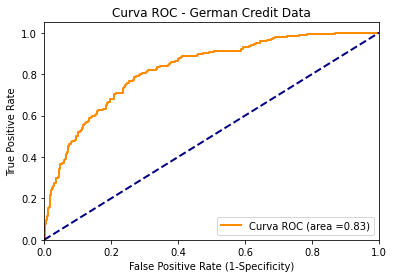

In [96]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import auc


fpr, tpr, thresholds = metrics.roc_curve(both['Clase'],both['probs'], #Calcula Receiver operating characteristic (ROC).
pos_label=1) # both['Clase']--> Etiquetas binarias verdaderas. both['probs']--> Puntuaciones objetivo 
             # Si y_true está entre {-1, 1} o {0, 1}, pos_label se esablece en 1

roc_auc = auc(fpr,tpr) # Calcule el área bajo la curva (AUC) utilizando la regla trapezoidal. 
plt.figure()           # Coordenadas x --> fpr ; Coordenadas y --> tpr
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='Curva ROC (area =%0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - German Credit Data')
plt.legend(loc="lower right")
plt.show()

# Variables eliminadas una por una.

In [97]:
credit_data_new.columns.values

array(['estado_cuenta_exist_A11', 'estado_cuenta_exist_A12',
       'estado_cuenta_exist_A13', 'estado_cuenta_exist_A14',
       'hist_cred_A30', 'hist_cred_A31', 'hist_cred_A32', 'hist_cred_A33',
       'hist_cred_A34', 'cuent_ahorros_A61', 'cuent_ahorros_A62',
       'cuent_ahorros_A63', 'cuent_ahorros_A64', 'cuent_ahorros_A65',
       'propósito_A40', 'propósito_A41', 'propósito_A410',
       'propósito_A42', 'propósito_A43', 'propósito_A44', 'propósito_A45',
       'propósito_A46', 'propósito_A48', 'propósito_A49',
       'propiedad_A121', 'propiedad_A122', 'propiedad_A123',
       'propiedad_A124', 'otros_planes_cuot_A141',
       'otros_planes_cuot_A142', 'otros_planes_cuot_A143',
       'emp_act_desde_A71', 'emp_act_desde_A72', 'emp_act_desde_A73',
       'emp_act_desde_A74', 'emp_act_desde_A75', 'estado_pers_sexo_A91',
       'estado_pers_sexo_A92', 'estado_pers_sexo_A93',
       'estado_pers_sexo_A94', 'trabajador_extranj_A201',
       'trabajador_extranj_A202', 'otros_deud_A1

In [98]:
remove_cols_extra_dummy = ['estado_cuenta_exist_A11', 'hist_cred_A30',
'propósito_A40', 'cuent_ahorros_A61','emp_act_desde_A71','estado_pers_sexo_A91',
'otros_deud_A101','propiedad_A121', 'otros_planes_cuot_A141','trabajador_extranj_A201']

In [99]:
remove_cols_insig = ['propósito_A46', 'propósito_A45', 'propósito_A44',
'cuent_ahorros_A63','otros_planes_cuot_A143','propiedad_A123',
'estado_cuenta_exist_A12', 'hist_cred_A32', 'hist_cred_A33',
'propósito_A410','propósito_A49', 'propósito_A48',
'propiedad_A122', 'estado_pers_sexo_A92','trabajador_extranj_A202','estado_pers_sexo_A94',
'propósito_A42','otros_deud_A102','Edad_en_años','cuent_ahorros_A64','cuent_ahorros_A62',
'cuent_ahorros_A65','otros_deud_A103','emp_act_desde_A72','emp_act_desde_A73','emp_act_desde_A74','emp_act_desde_A75']

In [100]:
# Aquí, hemos creado la lista adicional para eliminar variables insignificantes paso a paso de forma iterativa mientras 
# trabajamos en la metodología de eliminación hacia atrás; después del final de cada iteración, seguiremos agregando la 
# variable más insignificante y multicolineal a la lista remove_cols_insig, para que esas variables se eliminen mientras 
# se entrena el modelo.
#remove_cols_insig = []
remove_cols1 = list(set(remove_cols_extra_dummy+remove_cols_insig))

In [101]:
remove_cols1

['cuent_ahorros_A65',
 'emp_act_desde_A73',
 'propósito_A44',
 'propiedad_A121',
 'propósito_A49',
 'otros_planes_cuot_A141',
 'emp_act_desde_A75',
 'cuent_ahorros_A64',
 'estado_pers_sexo_A92',
 'propósito_A42',
 'cuent_ahorros_A63',
 'propósito_A46',
 'otros_deud_A102',
 'estado_pers_sexo_A91',
 'trabajador_extranj_A202',
 'cuent_ahorros_A62',
 'emp_act_desde_A72',
 'Edad_en_años',
 'otros_deud_A103',
 'propósito_A40',
 'propósito_A45',
 'estado_cuenta_exist_A11',
 'otros_planes_cuot_A143',
 'propósito_A48',
 'emp_act_desde_A74',
 'hist_cred_A33',
 'estado_pers_sexo_A94',
 'hist_cred_A32',
 'otros_deud_A101',
 'propósito_A410',
 'propiedad_A122',
 'trabajador_extranj_A201',
 'propiedad_A123',
 'hist_cred_A30',
 'estado_cuenta_exist_A12',
 'cuent_ahorros_A61',
 'emp_act_desde_A71']

## Regresión Logística con nuevas variables

In [102]:
import statsmodels.api as sm
logistic_model = sm.Logit(y_train, sm.add_constant(x_train.drop(
remove_cols1, axis=1))).fit()
print (logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.494255
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Clase   No. Observations:                  700
Model:                          Logit   Df Residuals:                      686
Method:                           MLE   Df Model:                           13
Date:                Wed, 26 Jan 2022   Pseudo R-squ.:                  0.1893
Time:                        14:29:13   Log-Likelihood:                -345.98
converged:                       True   LL-Null:                       -426.75
Covariance Type:            nonrobust   LLR p-value:                 9.564e-28
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                       

In [103]:
print ("\nFactor de inflación de varianza(Variance Inflation Factor)")
cnames = x_train.drop(remove_cols1,axis=1).columns #elimina la primera columna de cada categoría en x_train reduciendo el data
#set original de 50 columnas a 40 columnas

for i in np.arange(0,len(cnames)): # se crea un array Numpy que va desde 0 hasta a longitud de cnames (en este caso 40)
    
    xvars = list(cnames) #lista que contiene los nombres de las columnas ya con el filtro de "cnames"
    
    yvar = xvars.pop(i) # los 40 valores de cada columna siendo esttas las variables de respuesta (pop(i)) extrae el elemento
    #i-ésimo de la lista xvars
    
    mod = sm.OLS(x_train.drop(remove_cols1,axis=1)[yvar], sm.add_constant(x_train.drop(remove_cols1,axis=1)[xvars])) #calcula
    # los mínimos cuadrados ordinarios (OLS)
    # model = sm.OLS(Y,X) <---- sintaxis
    
    # X ---> sm.add_constant(x_train.drop(remove_cols,axis=1)[xvars]) ---> 40 data sets cuya primera columna es una columna de 
    # "unos" agregada a cada data set que antes poseía 39 coumnas al serle extraído una columna del data set original
    
    # Se agrega una columna de unos como una variable dependiente. La razón por la que tiene que hacer esto 
    # es porque la función de regresión asume que si no hay una columna constante, entonces desea ejecutar la regresión sin 
    #una intersección. 
    
    # Y ---> x_train.drop(remove_cols,axis=1)[yvar] ---> Cada header de cada columna se usa como variable de respuesta
    
    res = mod.fit() # Se calculan 40 regresiones con mínimos cuadrados
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))


Factor de inflación de varianza(Variance Inflation Factor)
estado_cuenta_exist_A13 1.087
estado_cuenta_exist_A14 1.126
hist_cred_A31 1.081
hist_cred_A34 1.344
propósito_A41 1.115
propósito_A43 1.104
propiedad_A124 1.135
otros_planes_cuot_A142 1.059
estado_pers_sexo_A93 1.131
Duración_en_meses 1.858
Monto_de_crédito 2.208
Tasa_de_cuota_en_porcentaje_del_ingreso_disponible 1.271
Número_de_créditos_existentes_en_este_banco 1.309


In [104]:
y_pred1 = pd.DataFrame(logistic_model.predict(sm.add_constant(x_train.drop (remove_cols1,axis=1)))) #Usamos e conjunto de prueba 
# para prededcir el valor de la variable de respuesta o a predecir "clase"
y_pred1.columns = ["probs"]
both = pd.concat([y_train,y_pred1],axis=1) #Juntamos el valor real contra el valor predicho
print(both)

     Clase     probs
541      0  0.341016
440      0  0.134771
482      0  0.735837
422      0  0.135314
778      0  0.050014
..     ...       ...
106      1  0.379538
270      0  0.159265
860      0  0.040114
435      1  0.235239
102      0  0.074998

[700 rows x 2 columns]


In [105]:
zeros = both[['Clase','probs']][both['Clase']==0] # filtro para tomar solo los valores que tienen Clase ==0 #Data_Frame
ones = both[['Clase','probs']][both['Clase']==1] # filtro para tomar solo los valores que tienen Clase ==1 #Data_Frame
def df_crossjoin(df1, df2, **kwargs):
    df1['_tmpkey'] = 1 # Agrega una nueva columna llena de "unos" al df1 
    df2['_tmpkey'] = 1 # Agrega una nueva columna llena de "unos" al df2
    res = pd.merge(df1, df2, on='_tmpkey', **kwargs).drop('_tmpkey',axis=1) # Parecido al comando INNER JOIN "" ON "" de SQL
    # en donde el header de la columna '_tmpkey' se usa como elemento común para unior df1 y df2 en un solo Data Frame y con 
    # drop eliminamos ambas columnas de "_tmpkey" creadas previamente
    
    # Se multplican 209 filas por 491 filas = 102,619 filas 
    
    res.index = pd.MultiIndex.from_product((df1.index, df2.index)) # Hace multi índices a partir del producto cartesiano
    #de múltiples iterables. 
    
    #print(res)
    
    #df1.drop('_tmpkey', axis=1, inplace=True) # no retorna ningún valor 
    #df2.drop('_tmpkey', axis=1, inplace=True) # no retorna ningún valor
    return res

In [106]:
joined_data1 = df_crossjoin(ones,zeros)

In [107]:
joined_data1

Clase_x   probs_x  Clase_y   probs_y
949 541        1  0.076897        0  0.341016
    440        1  0.076897        0  0.134771
    482        1  0.076897        0  0.735837
    422        1  0.076897        0  0.135314
    778        1  0.076897        0  0.050014
...          ...       ...      ...       ...
435 20         1  0.235239        0  0.087197
    71         1  0.235239        0  0.028263
    270        1  0.235239        0  0.159265
    860        1  0.235239        0  0.040114
    102        1  0.235239        0  0.074998

[102619 rows x 4 columns]

In [108]:
joined_data1['concordant_pair'] = 0 # Se agrega una columna llamada "concordant_pair"
joined_data1.loc[joined_data1['probs_x'] > joined_data1['probs_y'], # si probs_x (predicción) > probs_y "concordant_pair"=1
'concordant_pair'] =1                                            # Un par es concordante si la probabilidad contra la clase 1
                                                                 # es mayor que la clase 0 

joined_data1['discordant_pair'] = 0
joined_data1.loc[joined_data1['probs_x'] < joined_data1['probs_y'], #discordante si la probabilidad contra la clase 1 es menor 
'discordant_pair'] =1                                            #que la clase 0

joined_data1['tied_pair'] = 0                                     # Si ambas probabilidades son iguales, las ponemos 
joined_data1.loc[joined_data1['probs_x'] ==                        # en la categoría de par empatado.
joined_data1['probs_y'],'tied_pair'] =1                           # si probs_x (predicción) == probs_y "tied_pair"=1

p_conc = (sum(joined_data1['concordant_pair'])*1.0 )/(joined_data1.shape[0]) # suma el total de pares concordantes y lo vuelve 
                                                                           # decimal y se divide entre el total de pares con-
                                                                           # cordantes para ver el porcentaje de pares que son 
                                                                           # concordantes

p_disc = (sum(joined_data1['discordant_pair'])*1.0 )/(joined_data1.shape[0]) # suma el total de pares disconcordantes y lo vuelve 
                                                                           # decimal y se divide entre el total de pares con-
                                                                           # cordantes para ver el porcentaje de pares que son 
                                                                           # disconcordantes


c_statistic = 0.5 + (p_conc - p_disc)/2.0
print ("\nC-statistic:",round(c_statistic,4))



C-statistic: 0.7883


In [109]:
joined_data1

Clase_x   probs_x  Clase_y   probs_y  concordant_pair  \
949 541        1  0.076897        0  0.341016                0   
    440        1  0.076897        0  0.134771                0   
    482        1  0.076897        0  0.735837                0   
    422        1  0.076897        0  0.135314                0   
    778        1  0.076897        0  0.050014                1   
...          ...       ...      ...       ...              ...   
435 20         1  0.235239        0  0.087197                1   
    71         1  0.235239        0  0.028263                1   
    270        1  0.235239        0  0.159265                1   
    860        1  0.235239        0  0.040114                1   
    102        1  0.235239        0  0.074998                1   

         discordant_pair  tied_pair  
949 541                1          0  
    440                1          0  
    482                1          0  
    422                1          0  
    778                0          0  
...                  ...        ...  
435 20                 0          0  
    71                 0          0  
    270                0          0  
    860                0          0  
    102                0          0  

[102619 rows x 7 columns]

In [110]:
joined_data

Clase_x   probs_x  Clase_y   probs_y  concordant_pair  \
949 541        1  0.090936        0  0.199146                0   
    440        1  0.090936        0  0.206071                0   
    482        1  0.090936        0  0.288691                0   
    422        1  0.090936        0  0.099776                0   
    778        1  0.090936        0  0.021924                1   
...          ...       ...      ...       ...              ...   
435 20         1  0.160174        0  0.138267                1   
    71         1  0.160174        0  0.017693                1   
    270        1  0.160174        0  0.054821                1   
    860        1  0.160174        0  0.023286                1   
    102        1  0.160174        0  0.064269                1   

         discordant_pair  tied_pair  
949 541                1          0  
    440                1          0  
    482                1          0  
    422                1          0  
    778                0          0  
...                  ...        ...  
435 20                 0          0  
    71                 0          0  
    270                0          0  
    860                0          0  
    102                0          0  

[102619 rows x 7 columns]

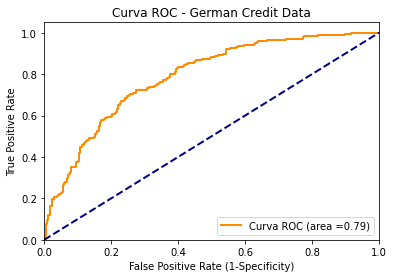

In [111]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import auc


fpr, tpr, thresholds = metrics.roc_curve(both['Clase'],both['probs'],
pos_label=1)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='Curva ROC (area =%0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - German Credit Data')
plt.legend(loc="lower right")
plt.show()

# Falta analizar el código de abajo

In [112]:
both

,Clase,probs
541,0,0.341016
440,0,0.134771
482,0,0.735837
422,0,0.135314
778,0,0.050014
...,...,...
106,1,0.379538
270,0,0.159265
860,0,0.040114
435,1,0.235239


In [124]:
both["y_pred"] = 0

In [125]:
both

,Clase,probs,y_pred
541,0,0.341016,0
440,0,0.134771,0
482,0,0.735837,0
422,0,0.135314,0
778,0,0.050014,0
...,...,...,...
106,1,0.379538,0
270,0,0.159265,0
860,0,0.040114,0
435,1,0.235239,0


In [126]:
both.loc[both["probs"]>0.1,'y_pred']

541    0
440    0
482    0
422    0
334    0
      ..
614    0
700    0
106    0
270    0
435    0
Name: y_pred, Length: 550, dtype: int64

In [114]:
accuracy_score

<function sklearn.metrics._classification.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)>

In [114]:
# Una vez que hemos encontrado la mejor situación del conjunto de datos de entrenamiento, la siguiente y última tarea 
# es predecir la categoría desde la probabilidad hasta el valor predeterminado. Hay muchas formas de establecer el valor de 
# umbral para convertir la probabilidad predicha en una clase real. En el siguiente código, hemos realizado una búsqueda de 
# cuadrícula simple para determinar el límite de umbral de mejor probabilidad. No obstante, incluso las curvas de sensibilidad 
# y especificidad podrían utilizarse para esta tarea.



for i in list(np.arange(0,1,0.1)): # crear array de 0 a 1 en pasos de 0.1
    both["y_pred"] = 0 # agregar columna "y_pred" con valores cero
    both.loc[both["probs"] > i, 'y_pred'] = 1 # Si e lvalor de la columna probs es mayor que los vcalores i
                                            # se le asigna valor de 1 
    print ("Threshold",i,"Train Accuracy:",
round(accuracy_score(both['Clase'], both['y_pred']),4)) # Se asigna la precisión 

# accuracy_score(y_true, y_pred)

Threshold 0.0 Train Accuracy: 0.2986
Threshold 0.1 Train Accuracy: 0.4929
Threshold 0.2 Train Accuracy: 0.6386
Threshold 0.30000000000000004 Train Accuracy: 0.7014
Threshold 0.4 Train Accuracy: 0.7471
Threshold 0.5 Train Accuracy: 0.7557
Threshold 0.6000000000000001 Train Accuracy: 0.7314
Threshold 0.7000000000000001 Train Accuracy: 0.73
Threshold 0.8 Train Accuracy: 0.7114
Threshold 0.9 Train Accuracy: 0.7029


In [115]:
# Ahora, se aplicará un umbral de 0,5 a los datos de prueba para verificar si el modelo es consistente en varios conjuntos
# de datos con el siguiente código:
both["y_pred"] = 0
both.loc[both["probs"] > 0.5, 'y_pred'] = 1
print ("\nTrain Confusion Matrix\n\n", pd.crosstab(both['Clase'],
both['y_pred'],rownames = ["Actuall"],colnames = ["Predicted"]))

print ("\nTrain Accuracy:",round(accuracy_score(both['Clase'],both['y_pred']),4))


Train Confusion Matrix

 Predicted    0   1
Actuall           
0          439  52
1          119  90

Train Accuracy: 0.7557


In [130]:
y_pred_test = pd.DataFrame( logistic_model.predict(sm.add_constant(x_test.drop(remove_cols1,axis=1)))) #Data frame con predicciones
y_pred_test.columns = ["probs"] # Se le asigna el nombre "probs" a la columna de predicciones

both_test = pd.concat([y_test,y_pred_test],axis=1) # se unen los daros reales y predichos del conjunto de prueba en un sollo DataFrame

both_test["y_pred"] = 0 # Se asigna una columna con ceros (300 ceros en total)}

both_test.loc[both_test["probs"] > 0.5, 'y_pred'] = 1 # Se filtran datos para asignar 0 o 1 según el umbral 0.5

print ("\nPrueba de la Matriz de Confusión\n\n", pd.crosstab( both_test['Clase'],
both_test['y_pred'],rownames = ["Real"],colnames = ["Predicho"]))

print ("\nPrecisión de la prueba(Test Accuracy):", round(accuracy_score( both_test['Clase'],
both_test['y_pred']),4))


Prueba de la Matriz de Confusión

 Predicho    0   1
Real             
0         193  16
1          52  39

Precisión de la prueba(Test Accuracy): 0.7733
